## WEEK 01

# **Credit Score Classification Model Development**

### **`Aim`** :The aim of this internship project is to create a predictive model that categorizes customers into three creditworthiness levels: Good, Standard, and Poor.


Importing neceesary libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Loading the data set

In [55]:
data=pd.read_csv('/content/credit.csv')

## **EDA**

In [56]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [57]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [58]:
data.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [59]:
data.shape

(100000, 28)

In [60]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [61]:
#DISPLAY THE FULL SUMMARY OF THE DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [62]:
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### its clear that data doesn't contain any missing value

In [63]:
#STATISTICAL SUMMARY OF THE GIVEN DATASET.
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [64]:
data.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

### Checking whether duplicate values present or not in the data set

In [65]:
data.duplicated().sum()

0

### No duplicate values present

# **DATA VISUALIZATION**

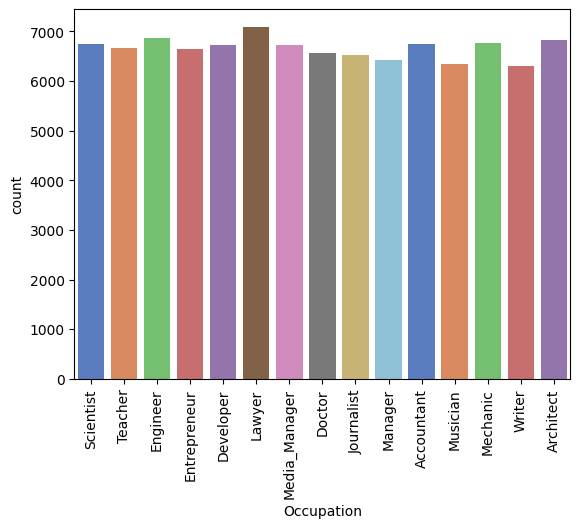

In [66]:
sns.countplot(x = data['Occupation'],palette = "muted")
plt.xticks(rotation = 90)
plt.show()
plt.figsize=(20,10)

([0, 1, 2], [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Poor')])

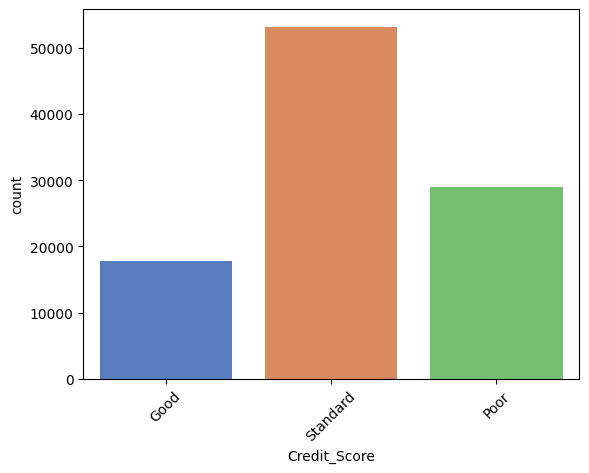

In [67]:
sns.countplot(x = data['Credit_Score'],palette = "muted");
plt.xticks(rotation = 45)

([0, 1, 2], [Text(0, 0, 'No'), Text(1, 0, 'NM'), Text(2, 0, 'Yes')])

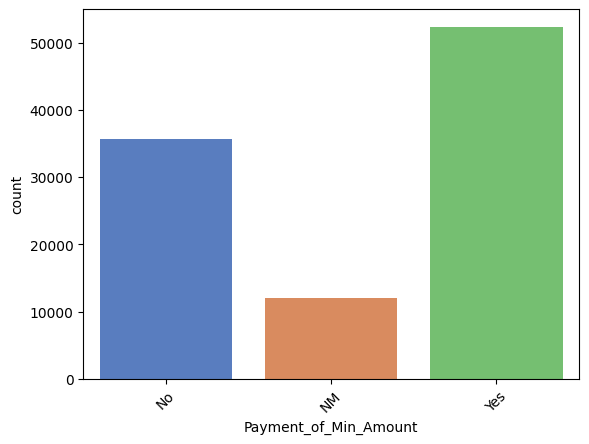

In [68]:
sns.countplot(x = data['Payment_of_Min_Amount'],palette = "muted");
plt.xticks(rotation = 45)

In [69]:
import warnings
warnings.filterwarnings("ignore")

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Customer_ID'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>, <Axes: title={'center': 'SSN'}>],
       [<Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>],
       [<Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Ax

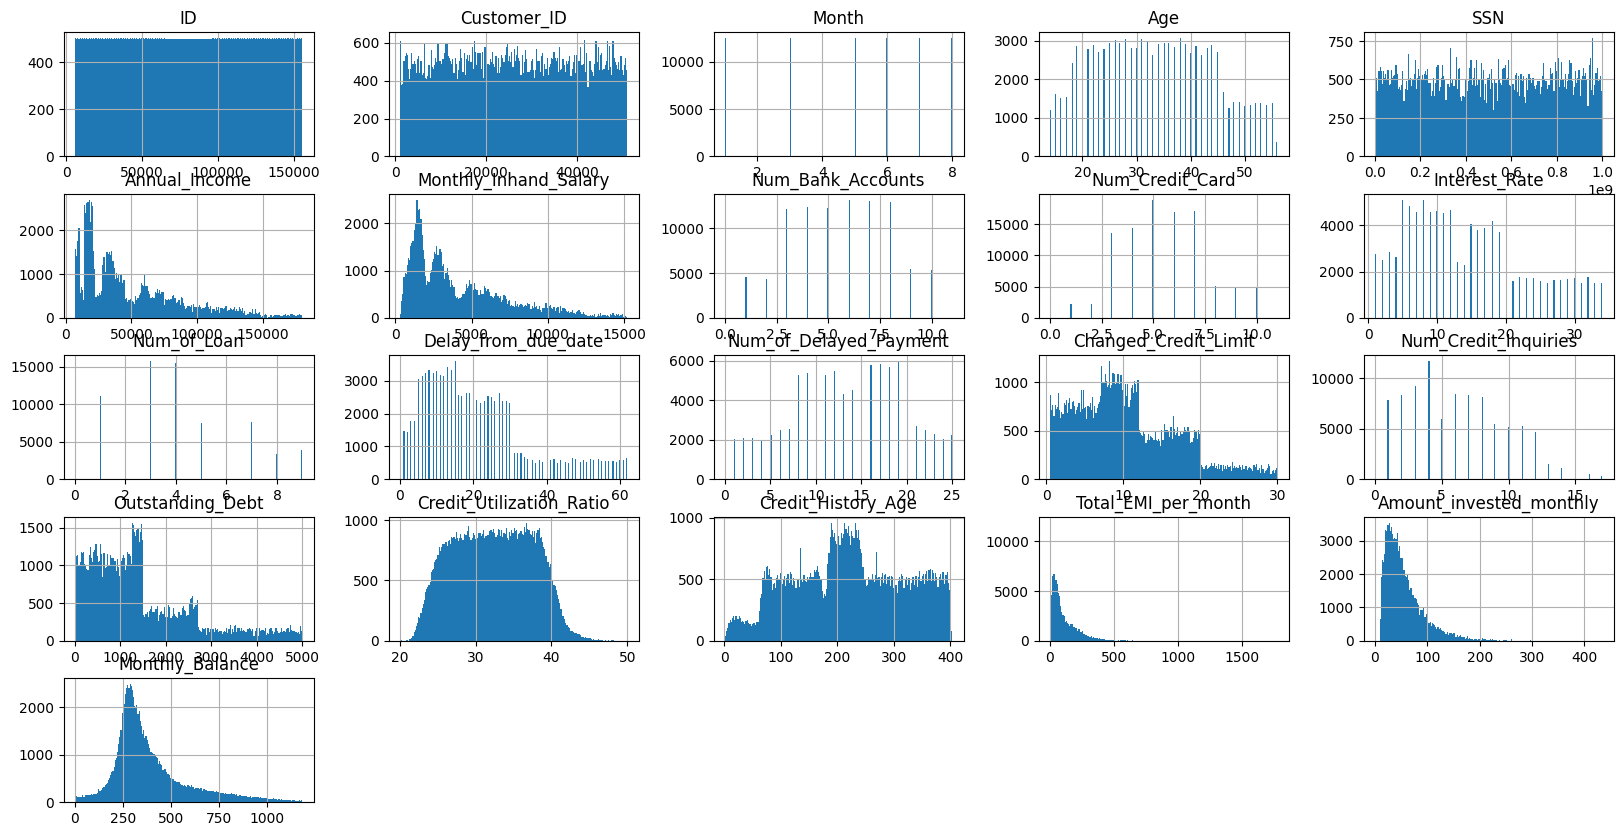

In [70]:
data.hist(bins=200,figsize=(20,10))


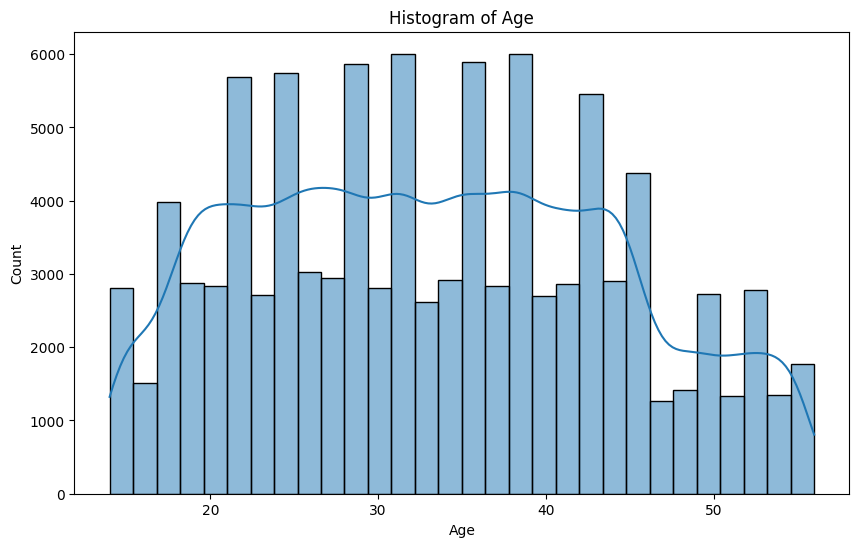

In [71]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [72]:
def pie_plot(data, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        data[col].value_counts().plot(ax=ax, kind='pie', figsize=(10, 10), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

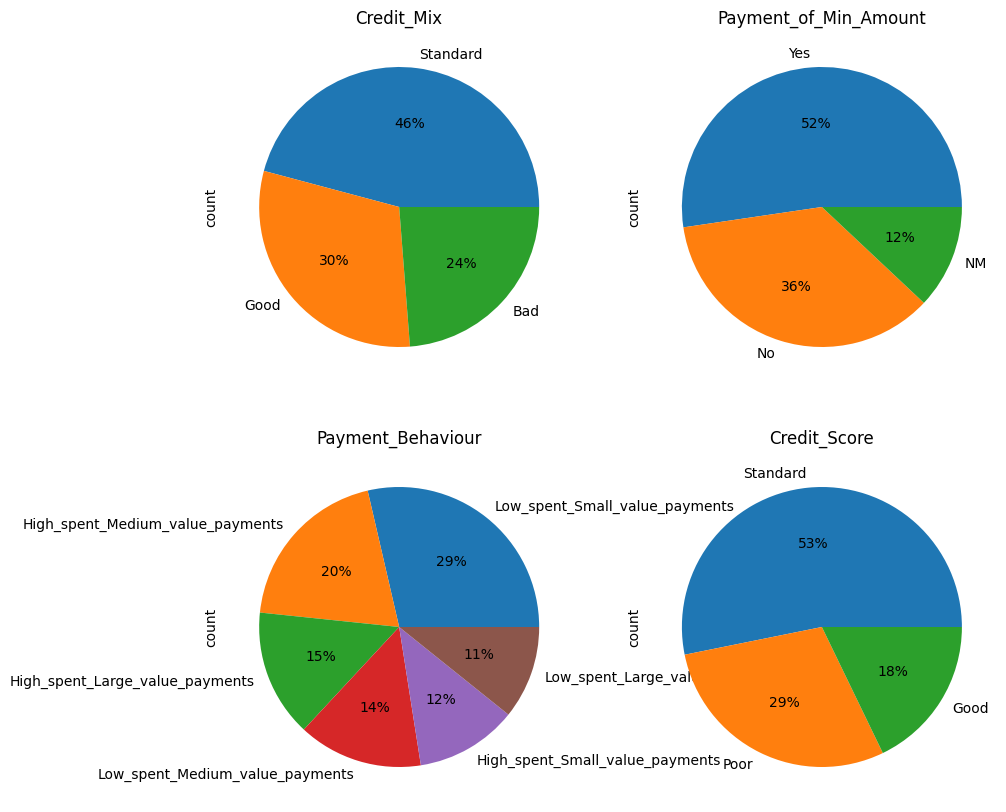

In [73]:
pie_plot(data, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],2,2)

In [106]:
numeric_cols = data.select_dtypes(exclude = "object").columns
cat_cols = data.select_dtypes(include = "object").columns
print(numeric_cols)
print(cat_cols)

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')
Index(['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score', 'Not Specified', 'Credit-Builder Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Payday Loan',
       'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')


<Axes: xlabel='Occupation', ylabel='count'>

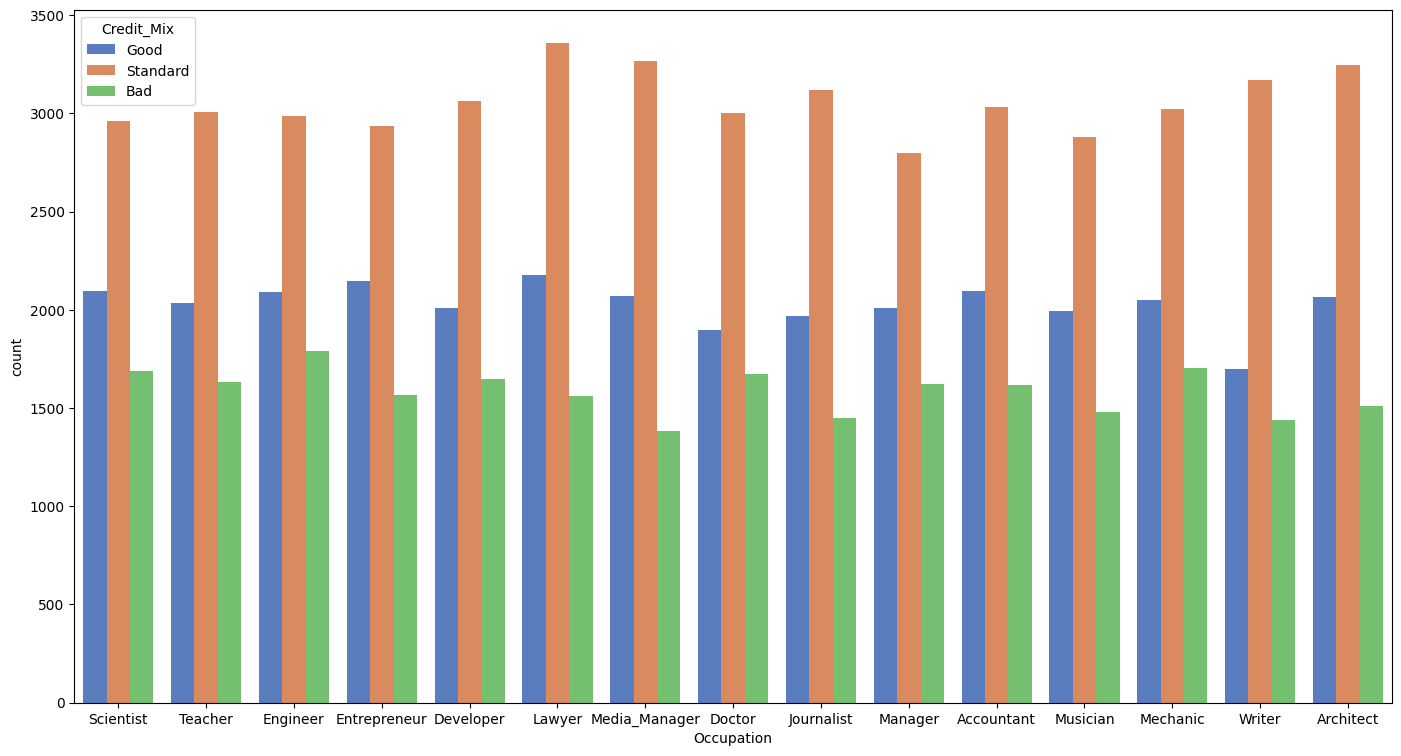

In [81]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Credit_Mix",palette="muted")

<Axes: xlabel='Occupation', ylabel='count'>

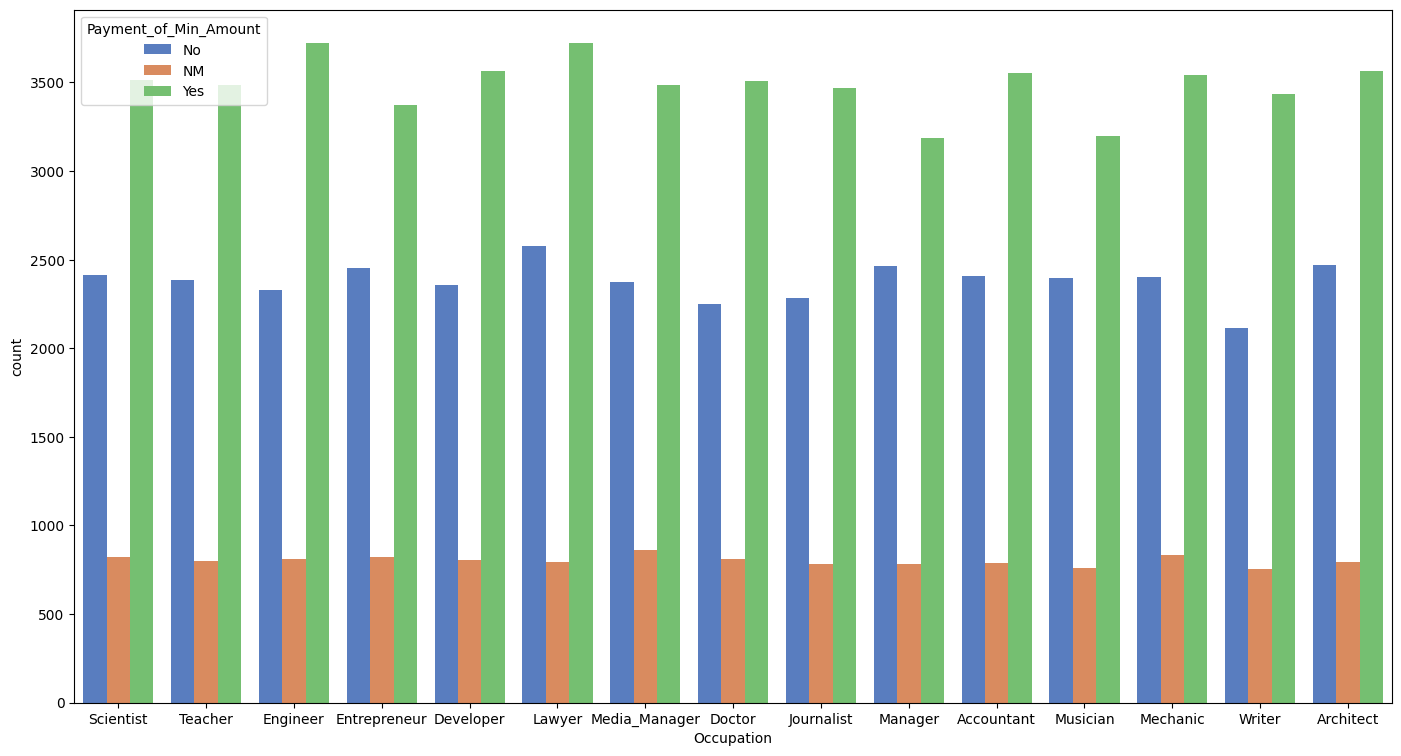

In [84]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Payment_of_Min_Amount",palette="muted")

<Axes: xlabel='Occupation', ylabel='count'>

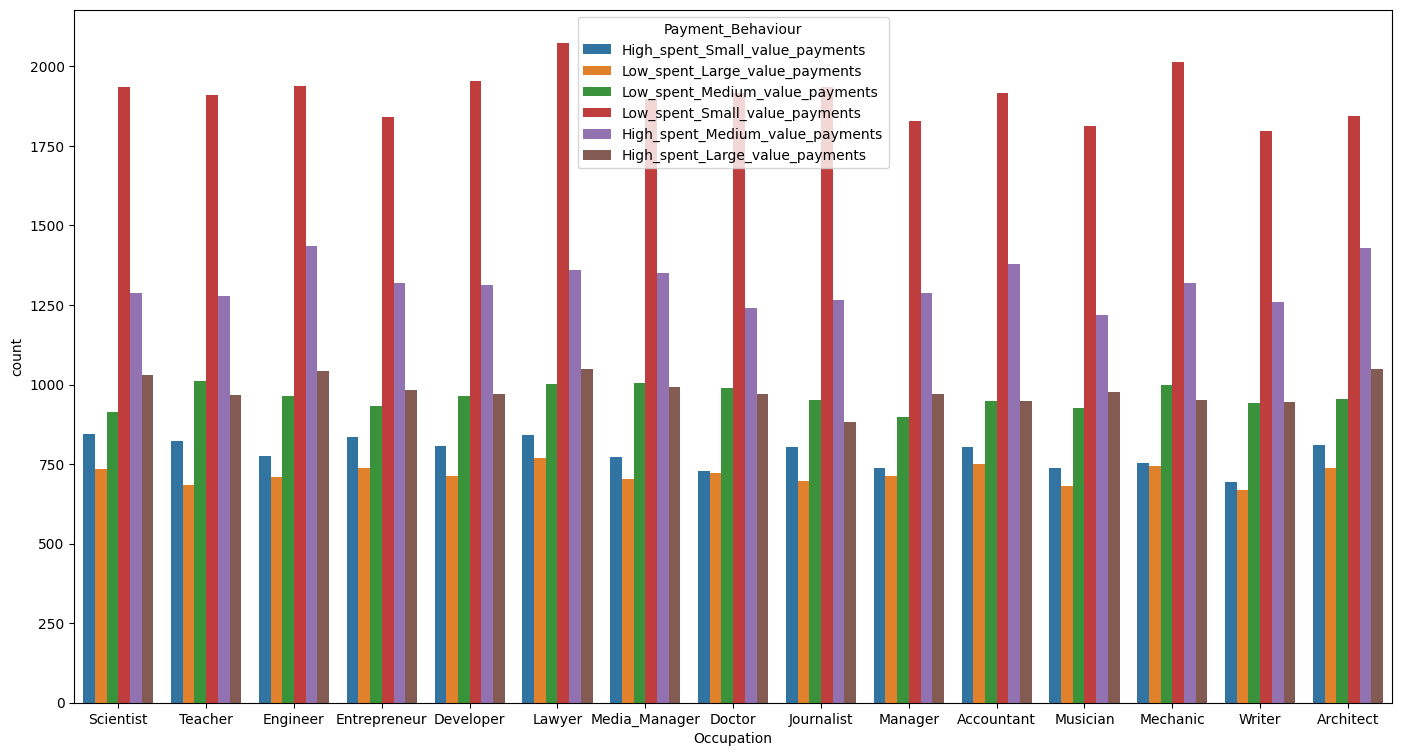

In [77]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Payment_Behaviour")

<Axes: xlabel='Occupation', ylabel='count'>

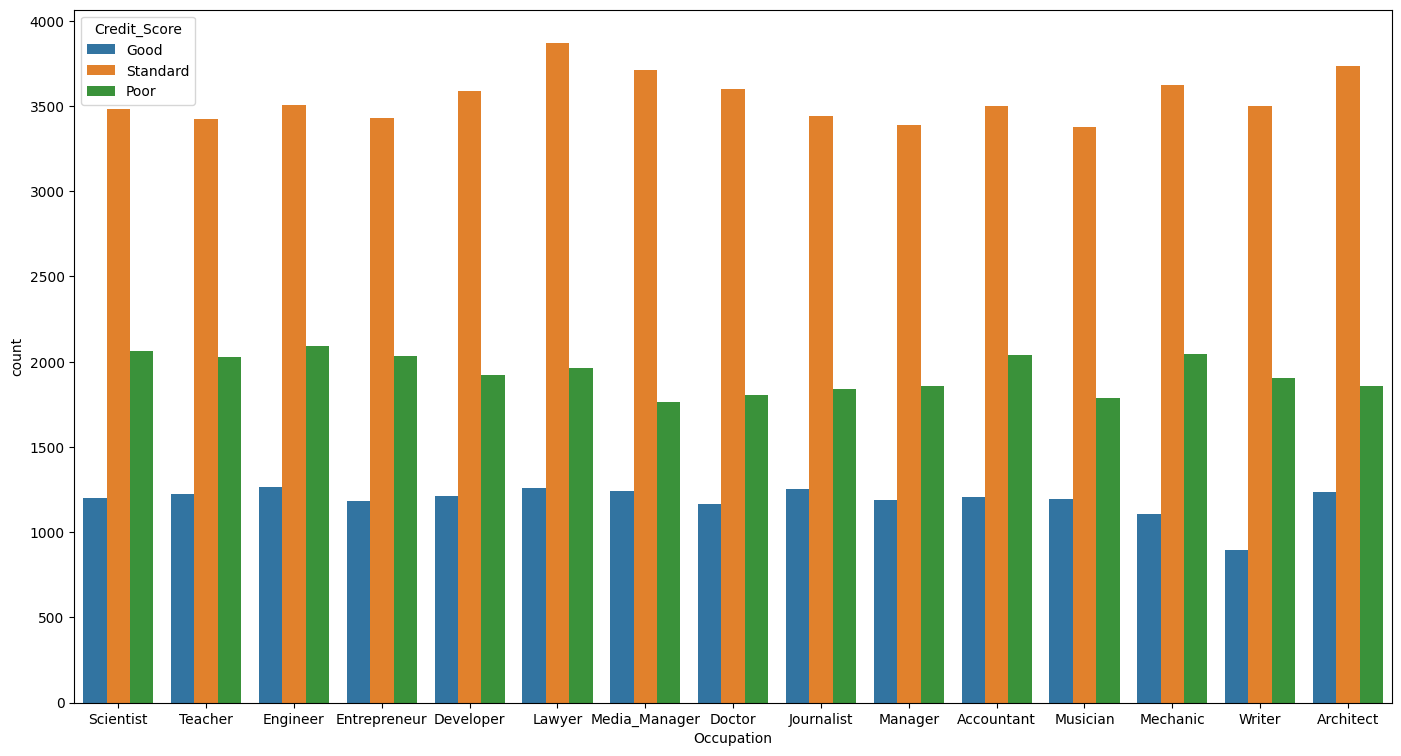

In [78]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Credit_Score")

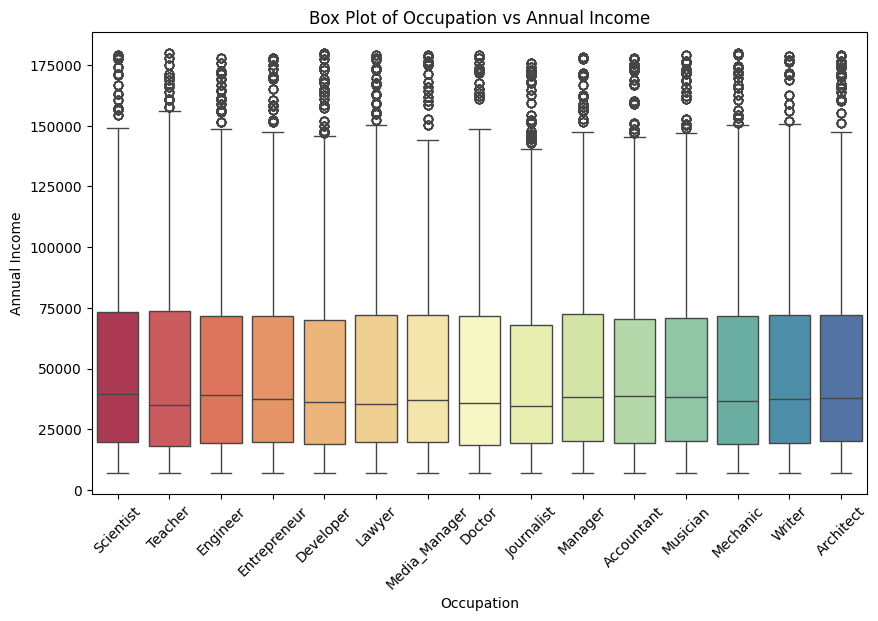

In [88]:
# Box Plot for Occupation vs Annual Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Annual_Income', data=data,palette="Spectral")
plt.title("Box Plot of Occupation vs Annual Income")
plt.xlabel("Occupation")
plt.ylabel("Annual Income")
plt.xticks(rotation=45)
plt.show()

### Plotting heat map

<Axes: >

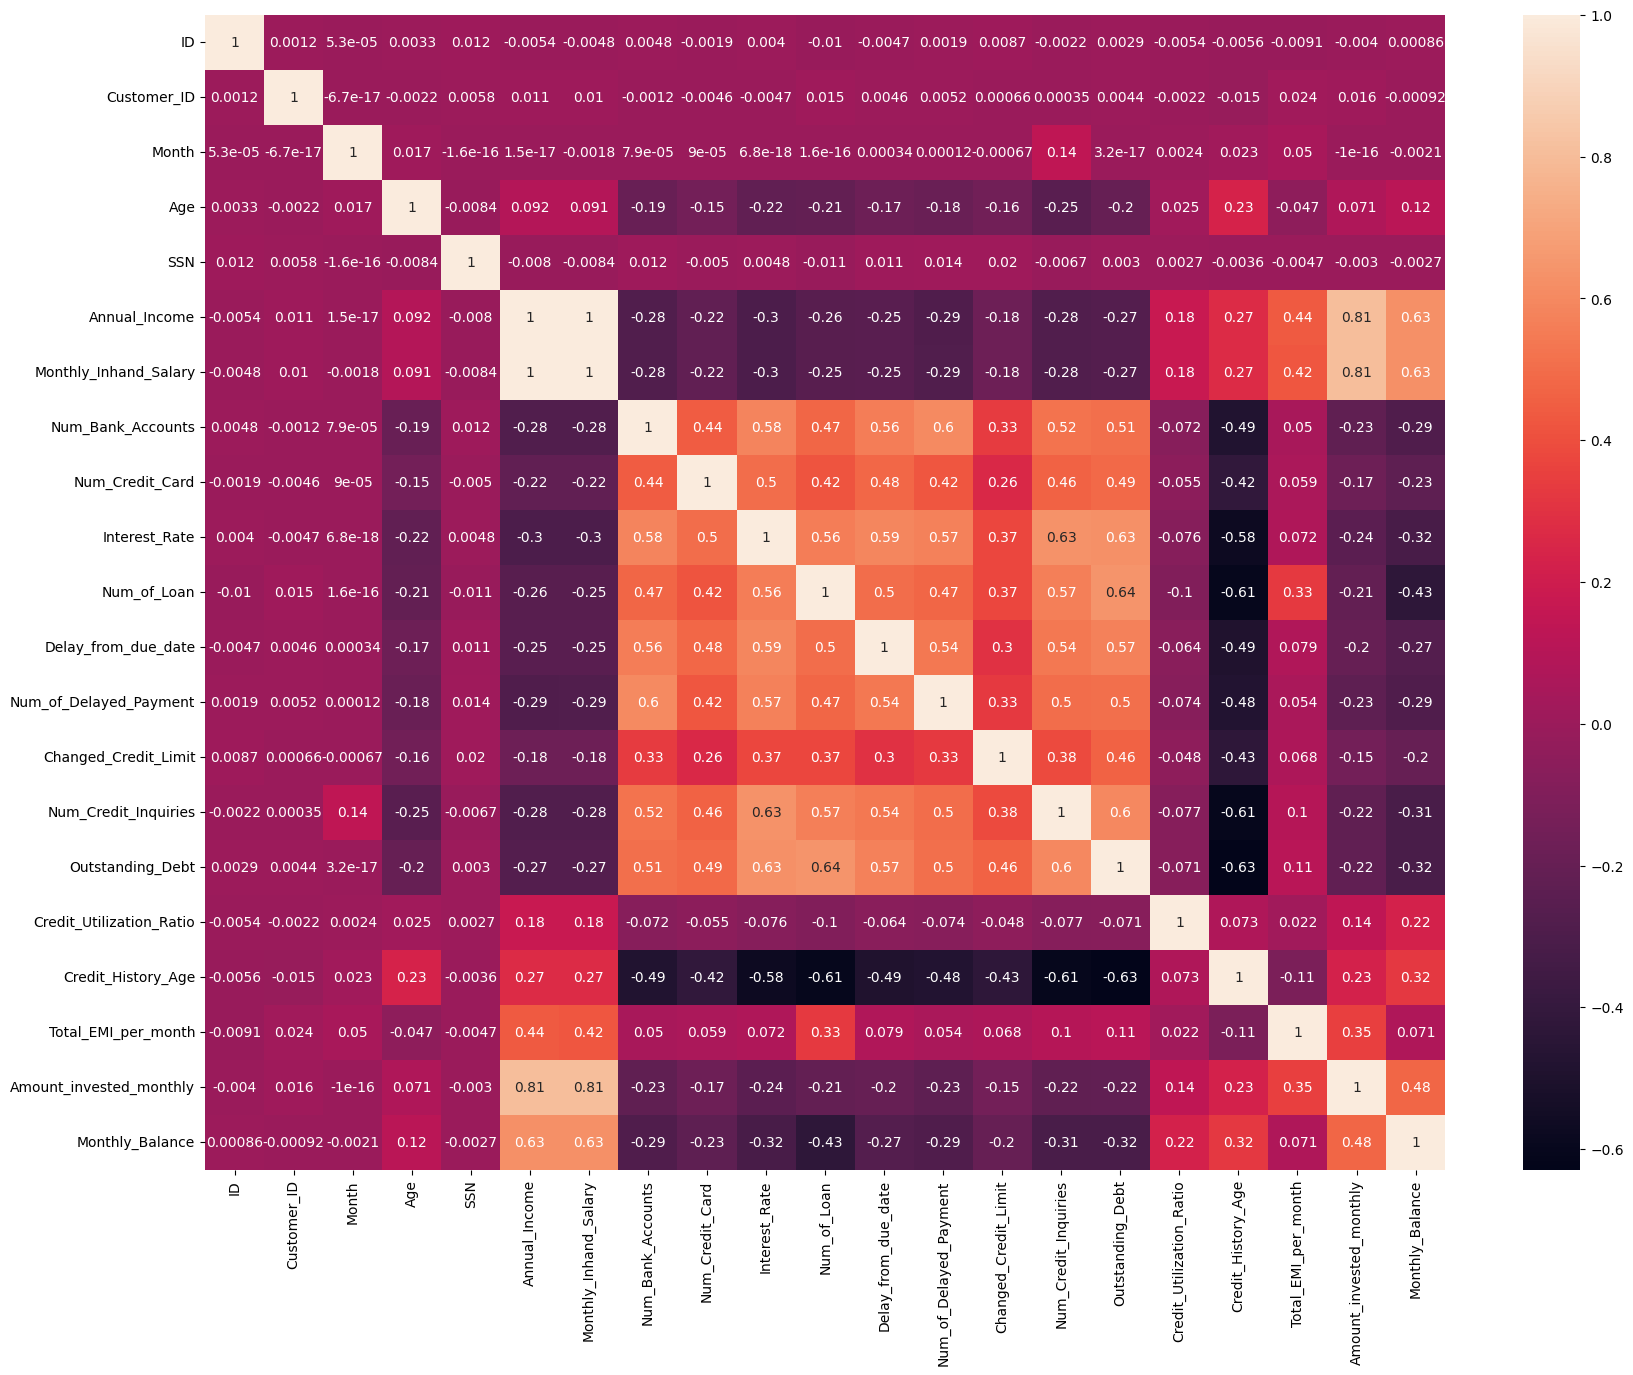

In [91]:
plt.figure(figsize= (20,15))
sns.heatmap(data[numeric_cols].corr(),annot=True)

In [94]:
data['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [96]:
data['Type_of_Loan'].value_counts()

Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

In [97]:
data['Num_Credit_Card'].nunique()

12

In [98]:
data['Num_Credit_Card'].unique()

array([ 4.,  5.,  1.,  7.,  6.,  8.,  3.,  9.,  2., 10., 11.,  0.])

#  **Data Pre Processing**

### Removing unnecessary columns which have less impact

In [99]:
data.drop('ID',axis=1,inplace=True)
data.drop('Customer_ID',axis=1,inplace=True)
data.drop('Month',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)
data.drop('Age',axis=1,inplace=True)
data.drop('SSN',axis=1,inplace=True)
data.drop('Occupation',axis=1,inplace=True)

 Put Credit Card owned to atleast one

In [100]:
data['Num_Credit_Card'].replace(0,1,inplace=True)

Divide type of loan in to different column

In [102]:
for i in data['Type_of_Loan'].value_counts().head(10).index[1:]:
    data[i] = data['Type_of_Loan'].str.contains(i).astype(str)

data.drop('Type_of_Loan', axis=1, inplace=True)

In [103]:
data.isnull().sum()

Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Not Specified               0
Credit-Builder Loan         0
Personal Loan               0
Debt Consolidation Loan     0
Student Loan                0
Payday Loan                 0
Mortgage Loan               0
Auto Loan                   0
Home Equity Loan            0
dtype: int64

### No null values present in the data set

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  float64
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

### Outlier detection

In [107]:
from re import S
skewness=data[numeric_cols].skew().sort_values(ascending=False)
print(skewness)

Total_EMI_per_month         4.041492
Amount_invested_monthly     1.761036
Monthly_Balance             1.355614
Outstanding_Debt            1.207536
Annual_Income               1.130223
Monthly_Inhand_Salary       1.128690
Delay_from_due_date         0.969840
Changed_Credit_Limit        0.708342
Interest_Rate               0.496232
Num_of_Loan                 0.445609
Num_Credit_Inquiries        0.406825
Num_Credit_Card             0.226926
Credit_Utilization_Ratio    0.028617
Credit_History_Age         -0.048832
Num_Bank_Accounts          -0.190015
Num_of_Delayed_Payment     -0.214470
dtype: float64


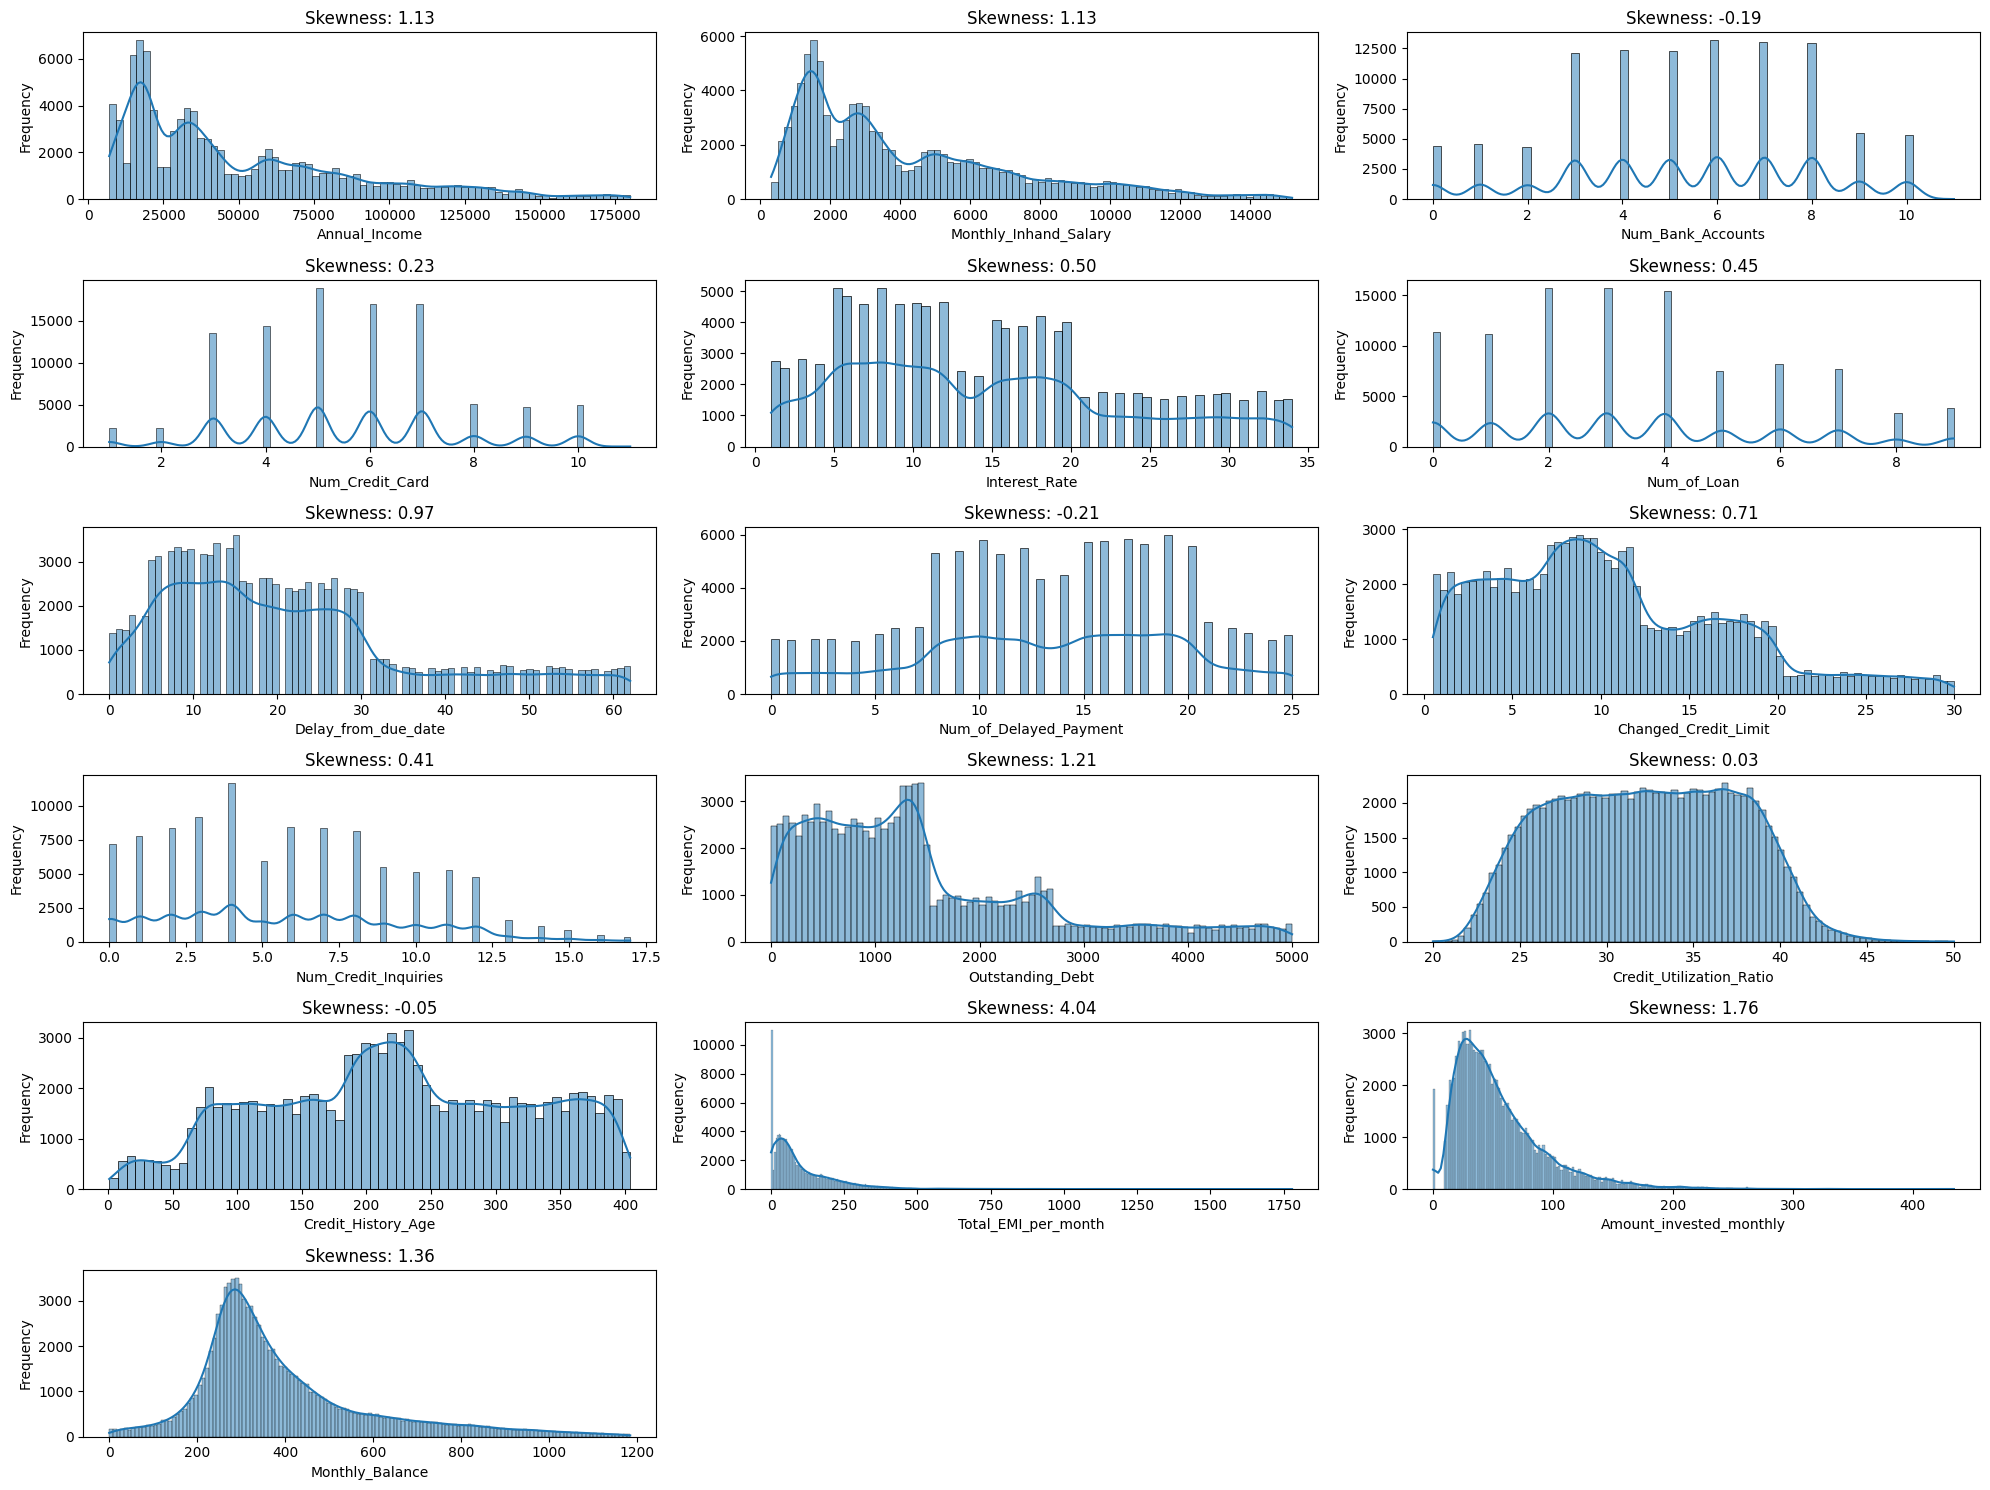

In [108]:
# PLOTTING SKEWNESS
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Skewness: {data[column].skew():.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [109]:
data.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Not Specified,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,...,Good,False,True,True,False,False,False,False,True,True
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,...,Good,False,True,True,False,False,False,False,True,True
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,...,Good,False,True,True,False,False,False,False,True,True
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,...,Good,False,True,True,False,False,False,False,True,True
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,...,Good,False,True,True,False,False,False,False,True,True


In [111]:
data.tail()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Not Specified,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
99995,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.5,3.0,...,Poor,False,False,False,False,True,False,False,True,False
99996,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.5,3.0,...,Poor,False,False,False,False,True,False,False,True,False
99997,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.5,3.0,...,Poor,False,False,False,False,True,False,False,True,False
99998,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.5,3.0,...,Standard,False,False,False,False,True,False,False,True,False
99999,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,6.0,11.5,3.0,...,Poor,False,False,False,False,True,False,False,True,False


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  float64
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

In [113]:
# Using for loop to detect numerical columns with outliers
new_columns_out = ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']


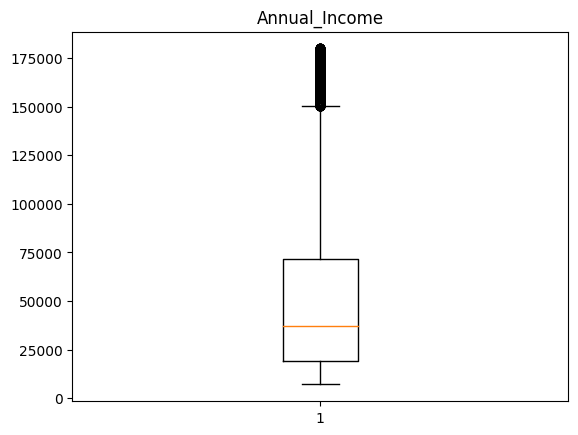

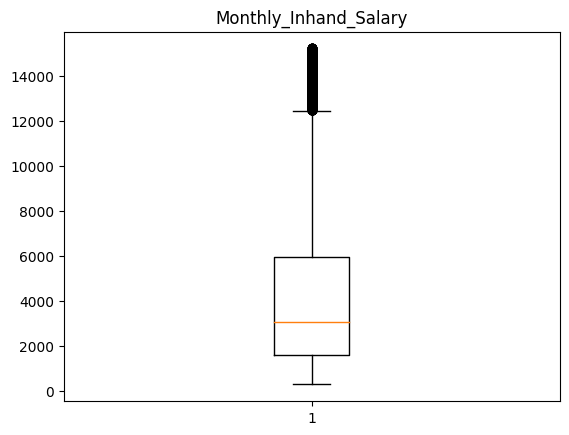

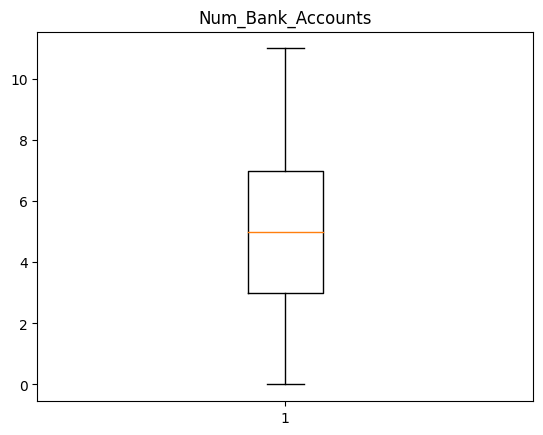

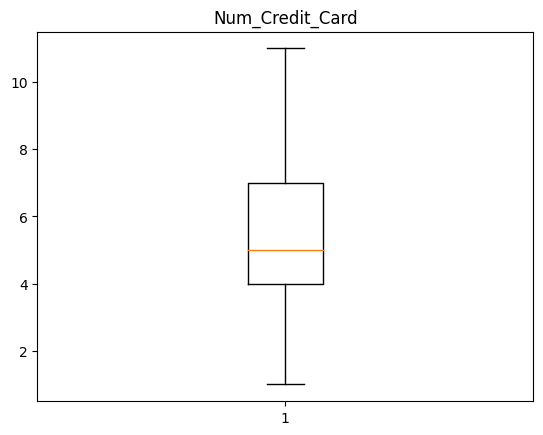

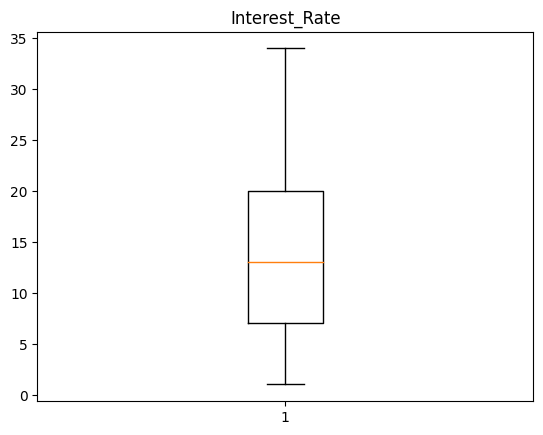

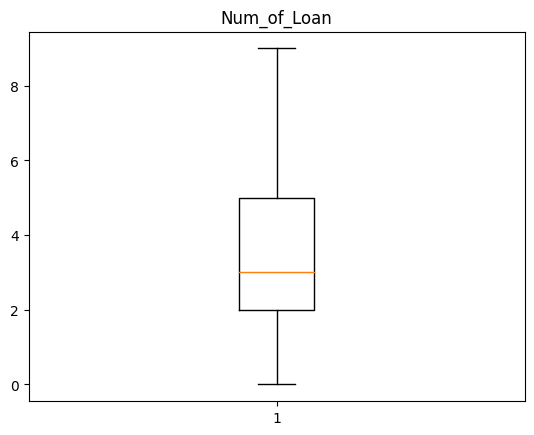

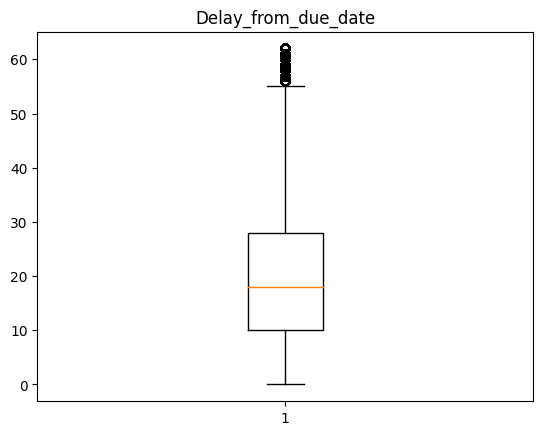

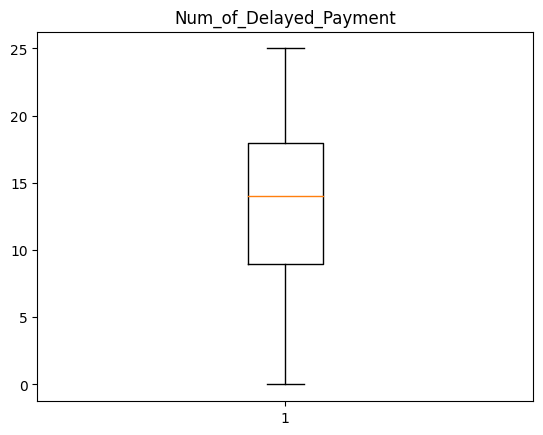

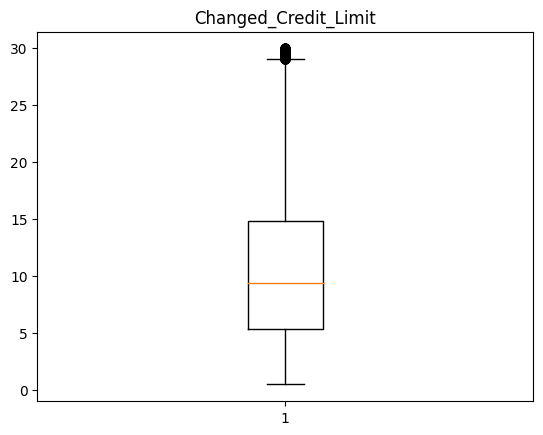

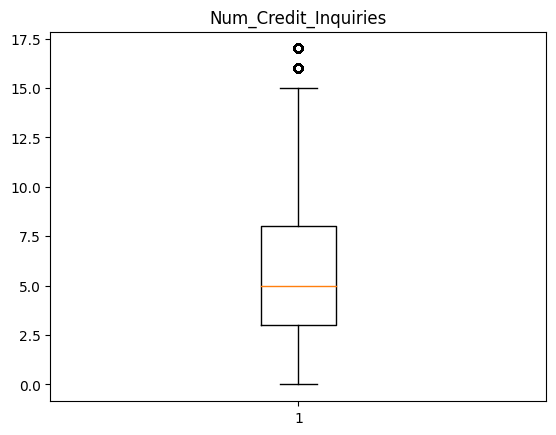

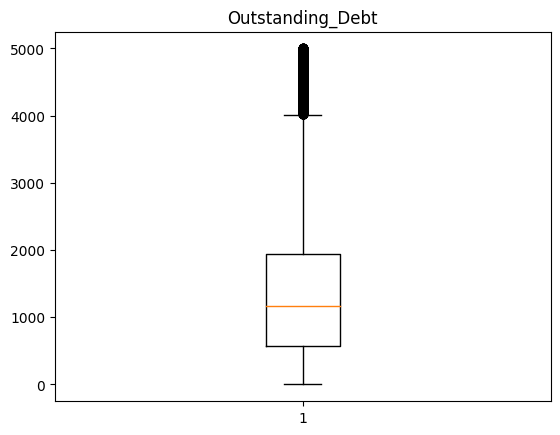

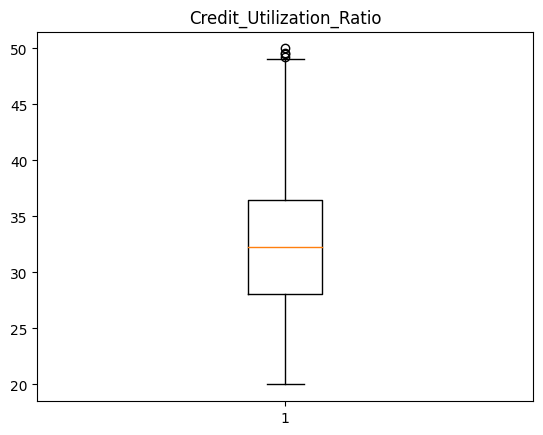

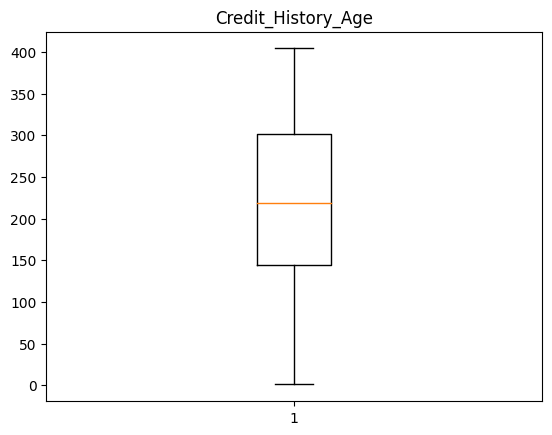

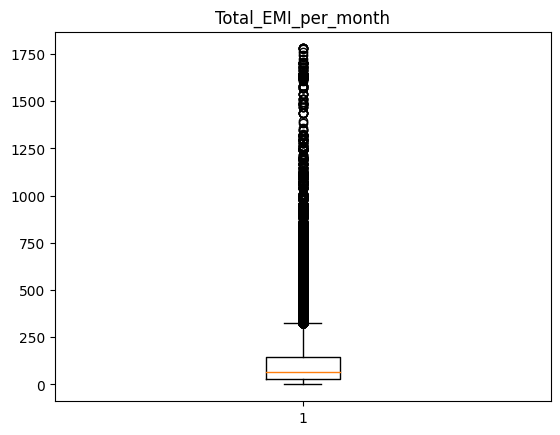

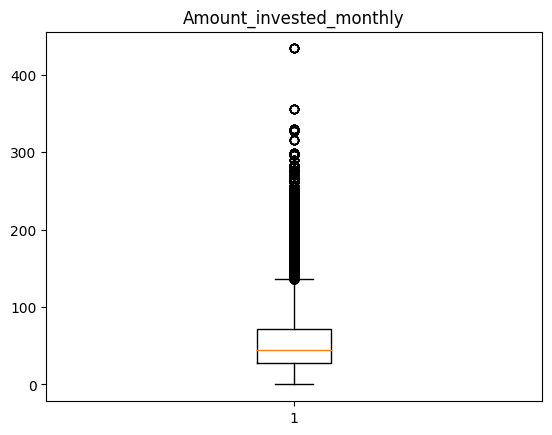

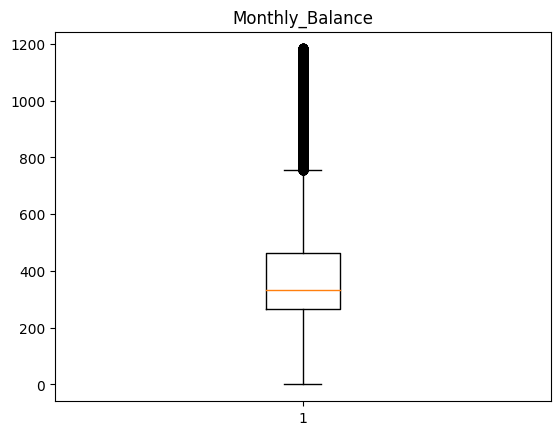

In [114]:
for i in new_columns_out:
  plt.figure(i)
  plt.boxplot(data[i])
  plt.title(i);

### Using IQR method for outlier removal

In [117]:
for j in ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']:
    Q1=np.percentile(data[j],25,method='midpoint')
    Q2=np.percentile(data[j],50,method='midpoint')
    Q3=np.percentile(data[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in data[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    data[j]=data[j].clip(lower=low_lim,upper=up_lim)

In [118]:
new_columns_out_final = ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

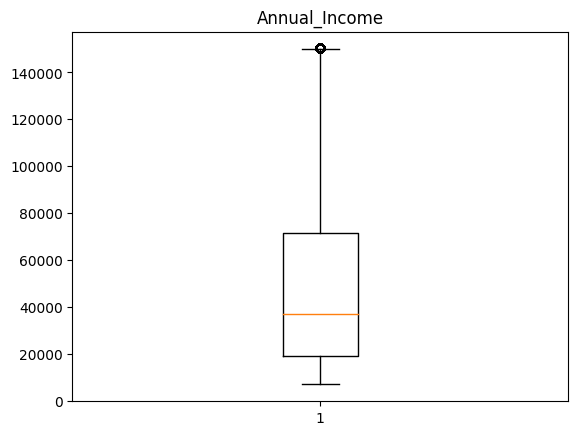

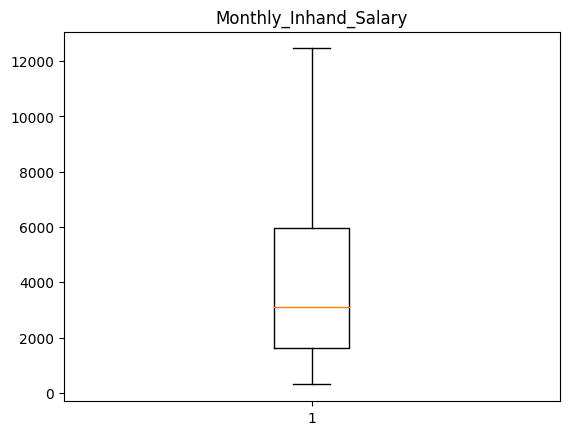

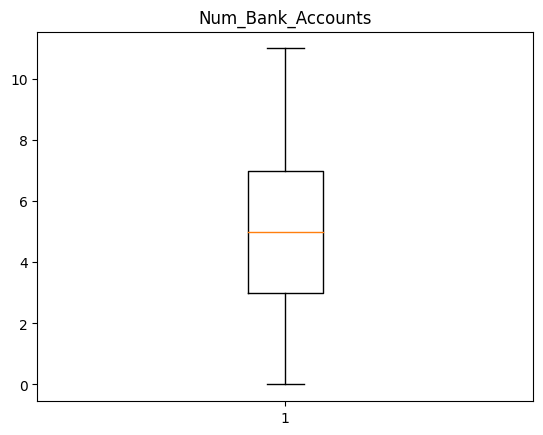

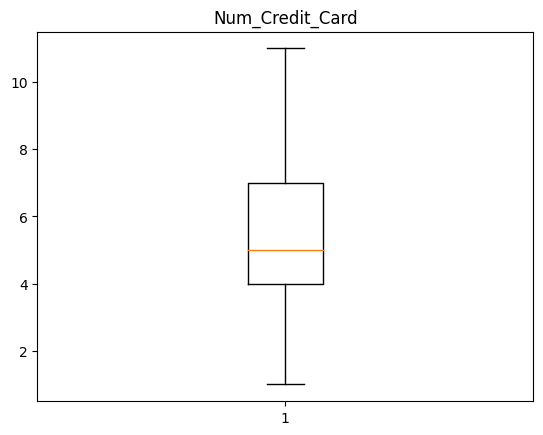

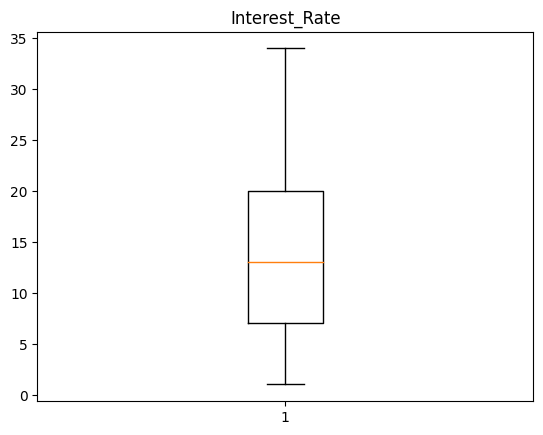

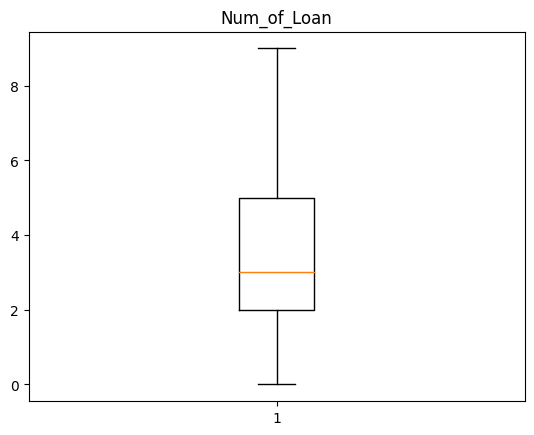

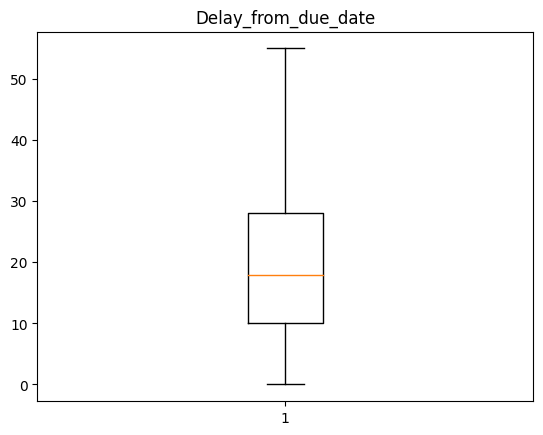

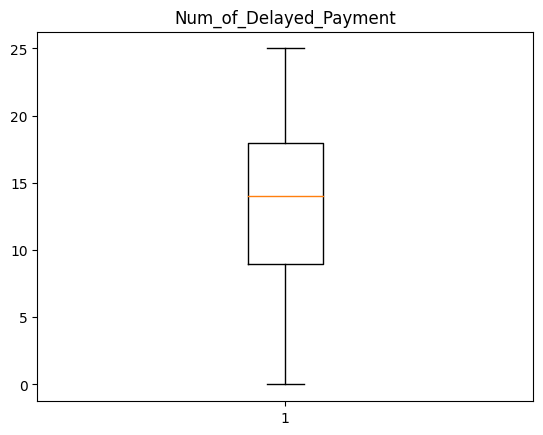

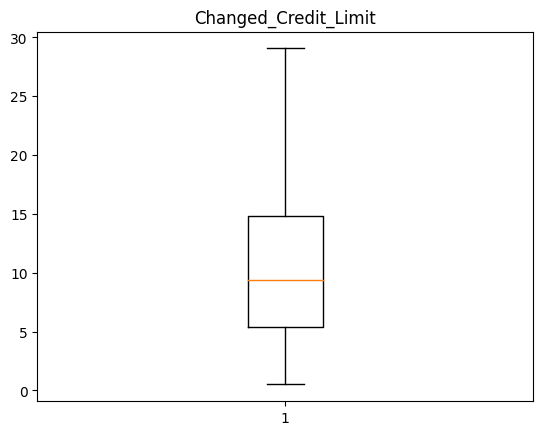

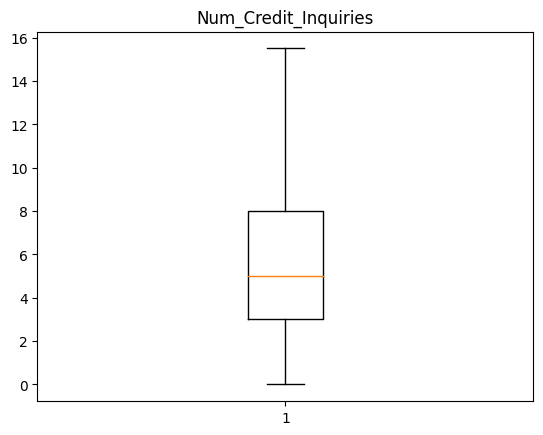

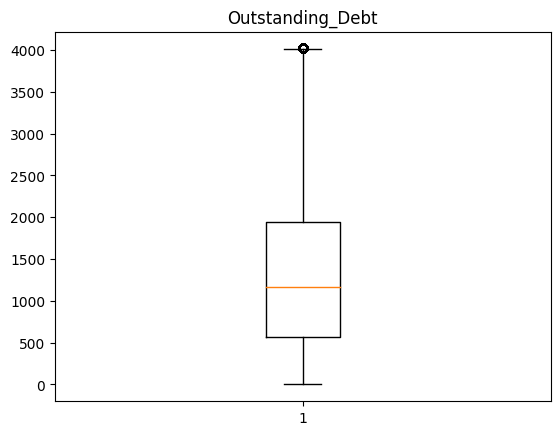

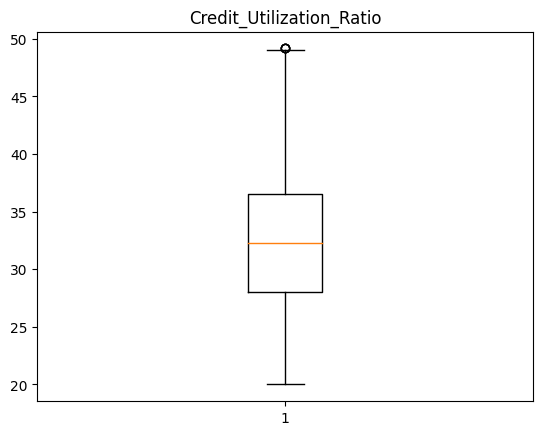

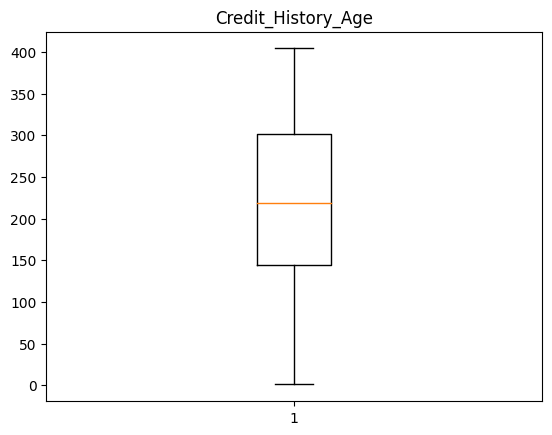

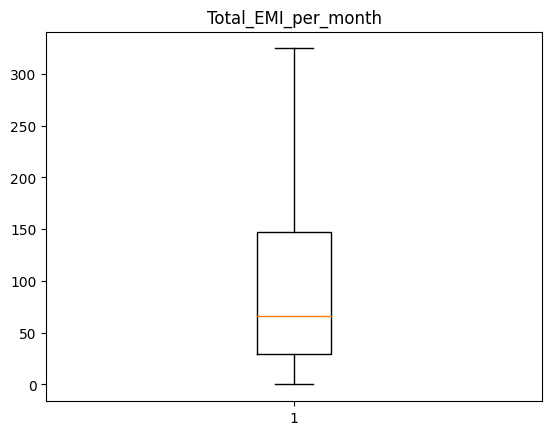

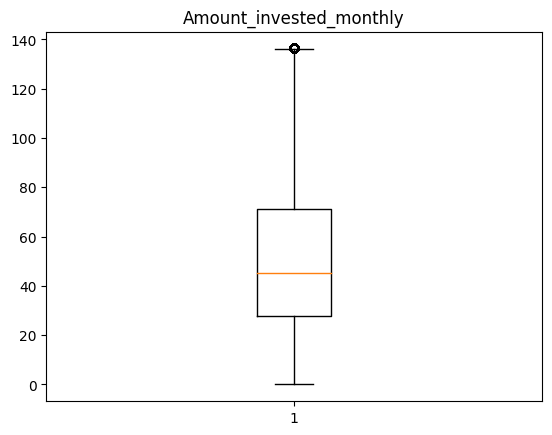

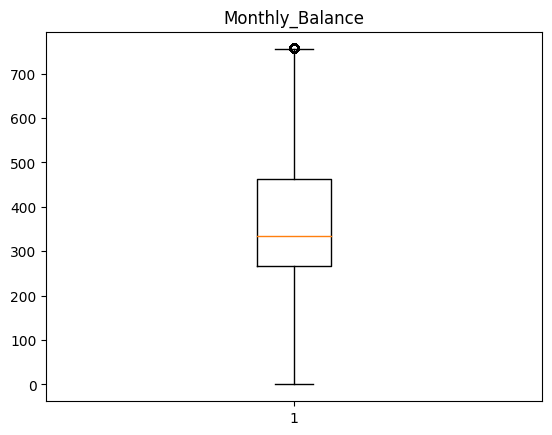

In [119]:
for z in new_columns_out_final:
  plt.figure(z)
  plt.boxplot(data[z])
  plt.title(z);

In [120]:
data.describe()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50187.123565,4169.919819,5.368820,5.533710,14.53208,3.532880,20.918030,13.313120,10.467515,5.791275,1399.897747,32.285156,221.220460,98.586705,53.463496,381.370204
std,37373.985236,3106.876173,2.593314,2.066757,8.74133,2.446356,14.395621,6.237166,6.601442,3.849239,1086.284812,5.116818,99.680716,92.290727,33.644003,172.149991
min,7005.930000,303.645417,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,150201.337500,12454.396250,11.000000,11.000000,34.00000,9.000000,55.000000,25.000000,29.055000,15.500000,4016.515000,49.162936,404.000000,324.578103,136.320266,756.629626


Removed outliers from numerical columns

## **Encoding & Scaling**

In [121]:
data.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Not Specified', 'Credit-Builder Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Payday Loan',
       'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  float64
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

Label encoding categorical columns

In [123]:
cat_col = ['Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score','Not Specified', 'Credit-Builder Loan', 'Personal Loan','Debt Consolidation Loan', 'Student Loan', 'Payday Loan','Mortgage Loan', 'Auto Loan', 'Home Equity Loan']

In [124]:
le=LabelEncoder()
for i in cat_cols:
  data[i]=le.fit_transform(data[i])

In [125]:
data.head(5)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Not Specified,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,...,0,0,1,1,0,0,0,0,1,1
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,...,0,0,1,1,0,0,0,0,1,1
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,...,0,0,1,1,0,0,0,0,1,1
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,...,0,0,1,1,0,0,0,0,1,1
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,...,0,0,1,1,0,0,0,0,1,1


In [126]:
data.tail(5)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Not Specified,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
99995,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.5,3.0,...,1,0,0,0,0,1,0,0,1,0
99996,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.5,3.0,...,1,0,0,0,0,1,0,0,1,0
99997,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.5,3.0,...,1,0,0,0,0,1,0,0,1,0
99998,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.5,3.0,...,2,0,0,0,0,1,0,0,1,0
99999,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,6.0,11.5,3.0,...,1,0,0,0,0,1,0,0,1,0


### Categorical columns are label encoded completly

### Checking correalation

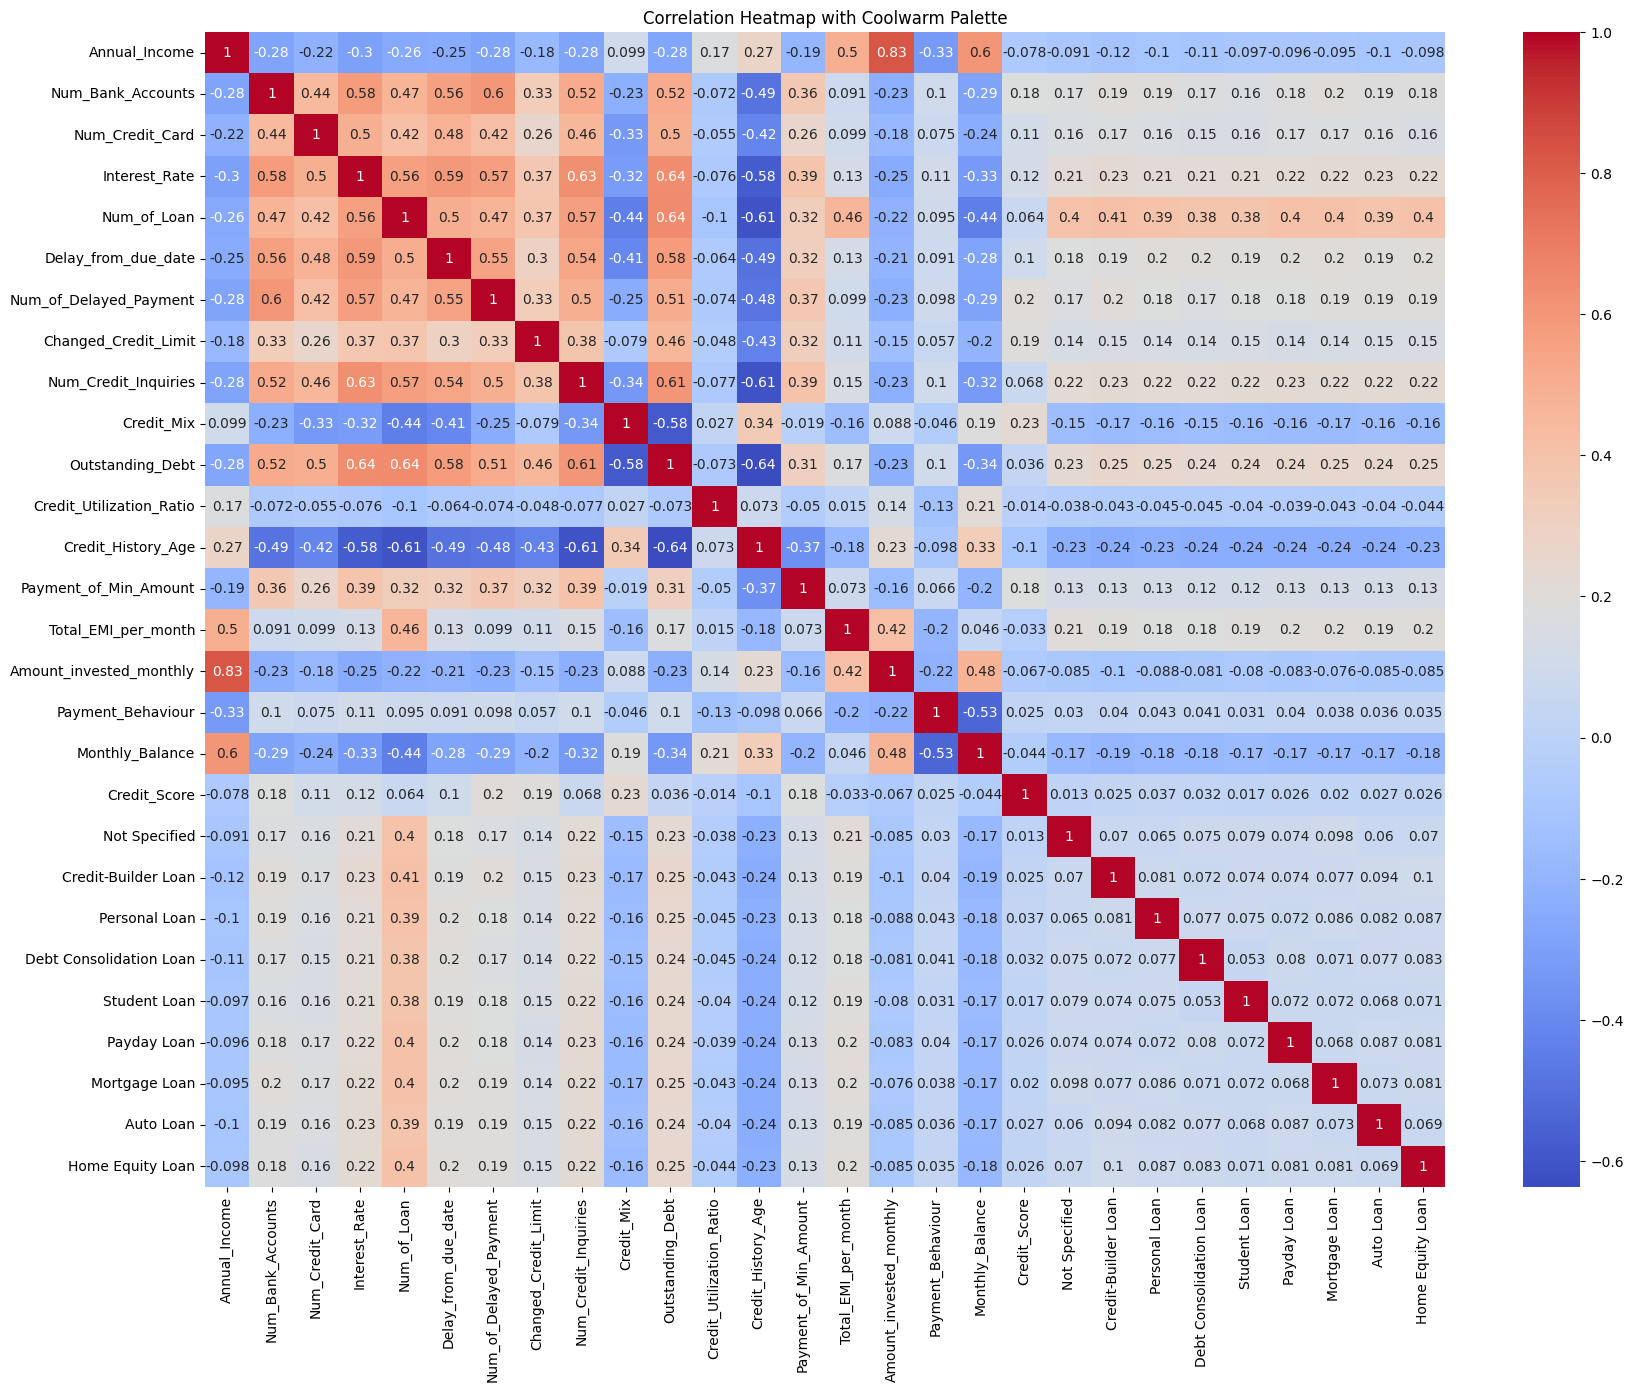

In [136]:
plt.figure(figsize= (20,15))
cmap = 'coolwarm'
sns.heatmap(data.corr(), annot=True, cmap=cmap)
plt.title("Correlation Heatmap with Coolwarm Palette")
plt.show()

### **Its clear from the heapmap that Annual Income and Monthly Inhand Salary highly correlared**

In [132]:
# Dropping MOnthly in hand Salary
data.drop('Monthly_Inhand_Salary',axis=1,inplace=True)

##**Train_test_split_test**

### Split the data: Create training and testing sets.For model development


In [133]:
y = data.Credit_Score
X = data.drop('Credit_Score',axis=1)

In [134]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_temp, y_test_temp, test_size=0.5, random_state=42)

In [135]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

## Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train_temp)
X_test_temp=sc.fit_transform(X_test_temp)
X_val=sc.fit_transform(X_train_temp)
X_test=sc.fit_transform(X_test_temp)